In [1]:
import os

In [2]:
os.system('make')
os.system('./TwoBody')

0

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
raw1 = np.loadtxt('data_task2/R_V')
t, r1, r2 = raw1[:, 0], raw1[:, 1:4], raw1[:, 4:7]
v1, v2 = raw1[:, 7:10], raw1[:, 10:13]
raw2 = np.loadtxt('data_task2/J')
j1, j2 = raw2[:, 1:4], raw2[:, 4:7]

In [5]:
para = np.loadtxt('data_task2/Para')
q = para[0]
m1, m2 = q / (1 + q), 1 / (1 + q)
rcom = m1 * r1 + m2 * r2

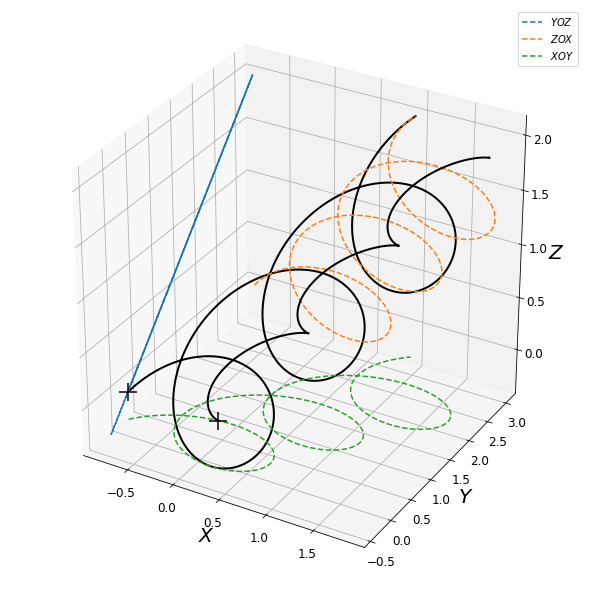

In [6]:
from mpl_toolkits.mplot3d import Axes3D
f, ax = plt.subplots(figsize=(8, 8), sharex='row')
ax = Axes3D(f)
#ax.axis('equal')
ax.plot3D(r1[:, 0], r1[:, 1], r1[:, 2], color='k', linewidth=2)
ax.plot3D(r1[:, 0] * 0 + r1[:, 0].min(),
          r1[:, 1],
          r1[:, 2],
          linestyle='--',
          label='$YOZ$')
ax.plot3D(r1[:, 0],
          r1[:, 1] * 0 + r1[:, 1].max(),
          r1[:, 2],
          linestyle='--',
          label='$ZOX$')
ax.plot3D(r1[:, 0],
          r1[:, 1],
          r1[:, 2] * 0 + r1[:, 2].min(),
          linestyle='--',
          label='$XOY$')
ax.plot3D(r2[:, 0], r2[:, 1], r2[:, 2], color='k', linewidth=2)
ax.scatter3D(r1[0, 0], r1[0, 1], marker='+', s=300, color='k')
ax.scatter3D(r2[0, 0], r2[0, 1], marker='+', s=300, color='k')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_zlabel(r'$Z$', fontsize=20)
ax.tick_params(labelsize=12)
ax.grid()
ax.legend()

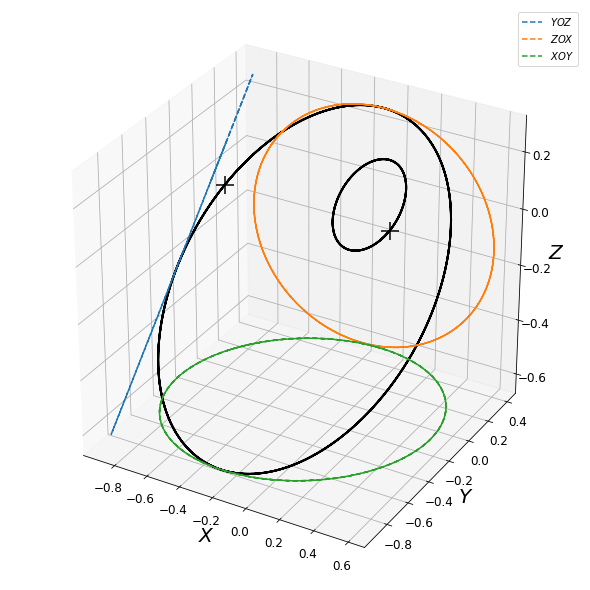

In [7]:
f, ax = plt.subplots(figsize=(8, 8), sharex='row')
ax = Axes3D(f)
R1 = r1 - rcom
R2 = r2 - rcom
ax.plot3D(R1[:, 0], R1[:, 1], R1[:, 2], color='k', linewidth=2)
ax.plot3D(R1[:, 0] * 0 + R1[:, 0].min(),
          R1[:, 1],
          R1[:, 2],
          linestyle='--',
          label='$YOZ$')
ax.plot3D(R1[:, 0],
          R1[:, 1] * 0 + R1[:, 1].max(),
          R1[:, 2],
          linestyle='--',
          label='$ZOX$')
ax.plot3D(R1[:, 0],
          R1[:, 1],
          R1[:, 2] * 0 + R1[:, 2].min(),
          linestyle='--',
          label='$XOY$')
ax.plot3D(R2[:, 0], R2[:, 1], R2[:, 2], color='k', linewidth=2)
ax.scatter3D(R1[0, 0], R1[0, 1], marker='+', s=300, color='k')
ax.scatter3D(R2[0, 0], R2[0, 1], marker='+', s=300, color='k')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_zlabel(r'$Z$', fontsize=20)
ax.tick_params(labelsize=12)
ax.grid()
ax.legend()

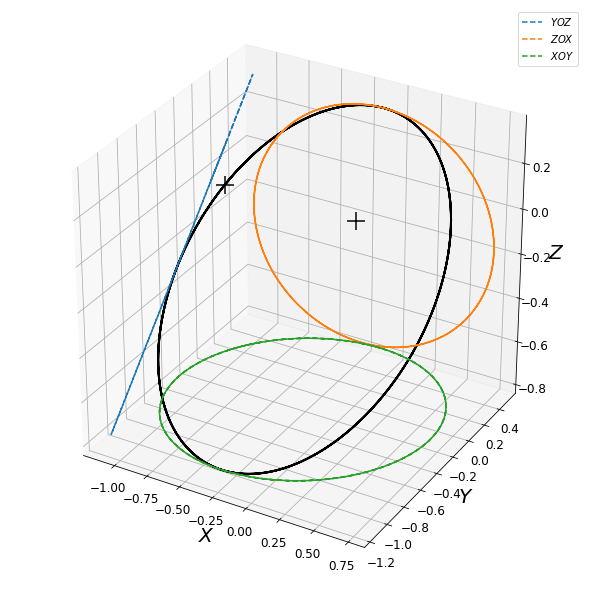

In [8]:
f, ax = plt.subplots(figsize=(8, 8), sharex='row')
ax = Axes3D(f)
R = r1 - r2
ax.plot3D(R[:, 0], R[:, 1], R[:, 2], color='k', linewidth=2)
ax.plot3D(R[:, 0] * 0 + R[:, 0].min(),
          R[:, 1],
          R[:, 2],
          linestyle='--',
          label='$YOZ$')
ax.plot3D(R[:, 0],
          R[:, 1] * 0 + R[:, 1].max(),
          R[:, 2],
          linestyle='--',
          label='$ZOX$')
ax.plot3D(R[:, 0],
          R[:, 1],
          R[:, 2] * 0 + R[:, 2].min(),
          linestyle='--',
          label='$XOY$')
ax.scatter3D(R[0, 0], R[0, 1], marker='+', s=300, color='k')
ax.scatter3D(R2[0, 0]*0, R2[0, 1]*0, marker='+', s=300, color='k')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_zlabel(r'$Z$', fontsize=20)
ax.tick_params(labelsize=12)
ax.grid()
ax.legend()

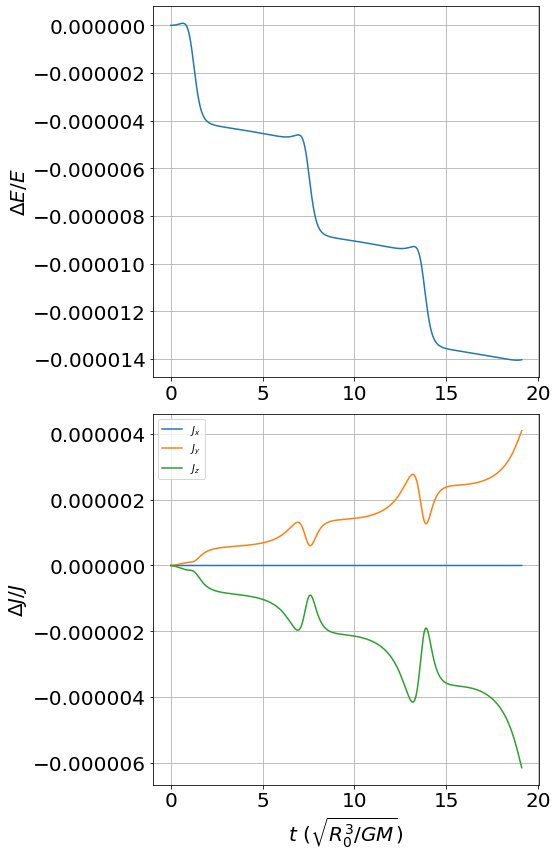

In [9]:
f, ax = plt.subplots(2, 1, figsize=(8, 12), sharex='row')

ax[0].set_ylabel(r'$\Delta E/E$', fontsize=20)
ax[0].tick_params(labelsize=20)
ax[0].grid()

ax[1].set_ylabel(r'$\Delta J/J$', fontsize=20)
ax[1].set_xlabel(r'$t\ (\sqrt{R_0^3/GM})$', fontsize=20)
ax[1].tick_params(labelsize=20)
ax[1].grid()

dr = np.sqrt(np.inner(r1 - r2, r1 - r2).diagonal())
K = 0.5 * m1 * np.inner(v1, v1).diagonal() + 0.5 * m2 * np.inner(
    v2, v2).diagonal()
V = -m1 * m2 / dr

dE_E = (K + V - (K[0] + V[0])) / (K[0] + V[0])
dJ_J = ((j1 + j2) - (j1 + j2)[0, :]) / np.sqrt(
    (j1 + j2)[0, :] @ (j1 + j2)[0, :])
ax[0].plot(t, dE_E)
ax[1].plot(t, dJ_J[:, 0], label=r'$J_x$')
ax[1].plot(t, dJ_J[:, 1], label=r'$J_y$')
ax[1].plot(t, dJ_J[:, 2], label=r'$J_z$')
ax[1].legend()

f.tight_layout()